# url: https://qiita.com/maskot1977/items/4db7976a987a057ad3ba

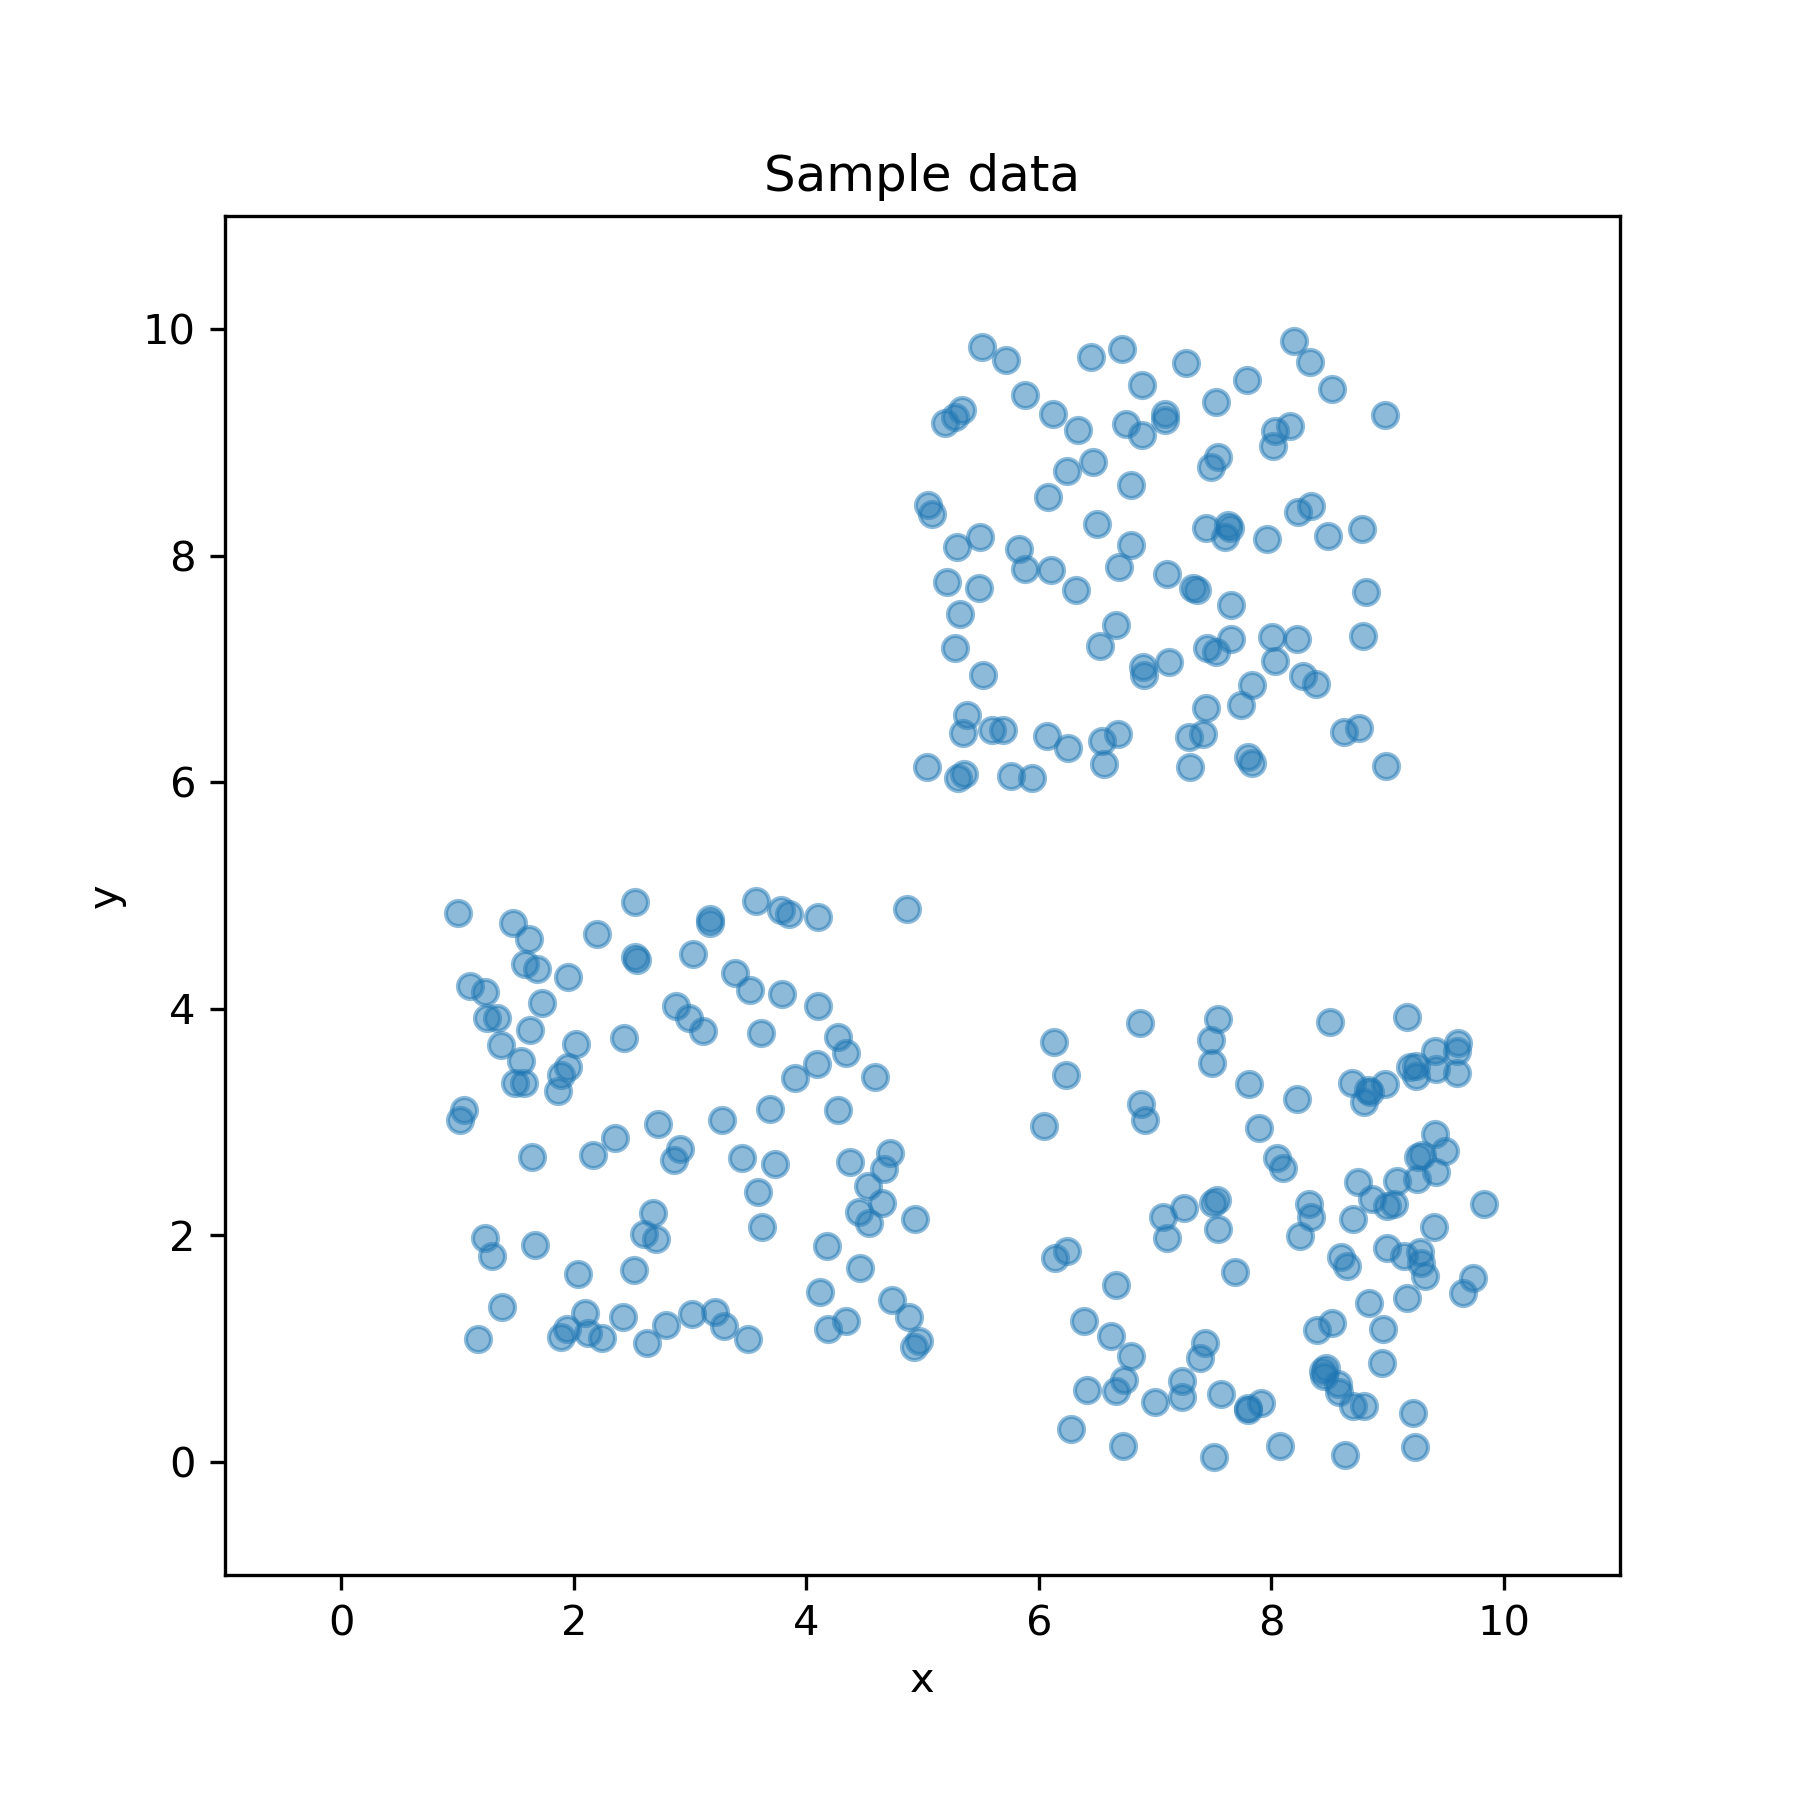

上の散布図を見ると，直感的には次の 3 つのクラスタに分類できそうである．

    右上のクラスタ
    左下のクラスタ
    右下のクラスタ

k-means は次のような手順でクラスタリングを行います．

1. k個のクラスタ（グループ）の中心となるデータをランダムに決める
2. 各データを最も近いクラスタに割り当てる
3. 各クラスタの中心を再計算する
4. 収束するまで 2., 3. の処理を繰り返す

ここでは実際に非階層クラスタリングによって直感どおりの分類ができるかどうか確かめよう．

まず，Anaconda Prompt 等で pip list を実行して「scikit-learn」パッケージがインストールされていることを確認する．もしもインストールされていなければ pip install scikit-learnでインストールしておく．Jupyter Notebook のシェルコマンドを利用しても構いません．「scikit-learn」のインストールが確認できれば，必要なモジュールをインポートする．

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 次に，GitHub のリポジトリからサンプルデータ (clustering-sample.csv) を Pandas のデータフレームに読み込んで表示してみる．
# なお，Web ブラウザで CSV ファイルをダウンロードして Python プログラムと同じフォルダにコピーしたものを読み込んでも良い．

url = "https://github.com/rinsaka/sample-data-sets/blob/master/clustering-sample.csv?raw=true"
# url = "clustering-sample.csv"  # カレントディレクトリから読み込む場合
df = pd.read_csv(url)
df

,ID,x,y
0,0,7.4346,6.6520
1,1,6.5419,6.3611
2,2,8.9819,9.2461
3,3,3.8554,4.8386
4,4,1.9527,3.4848
...,...,...,...
295,295,4.1205,1.5010
296,296,9.2843,1.7563
297,297,6.6627,7.3856
298,298,5.7654,6.0543


上で表示した散布図と同じものを描いてみる．

## 散布図の作成

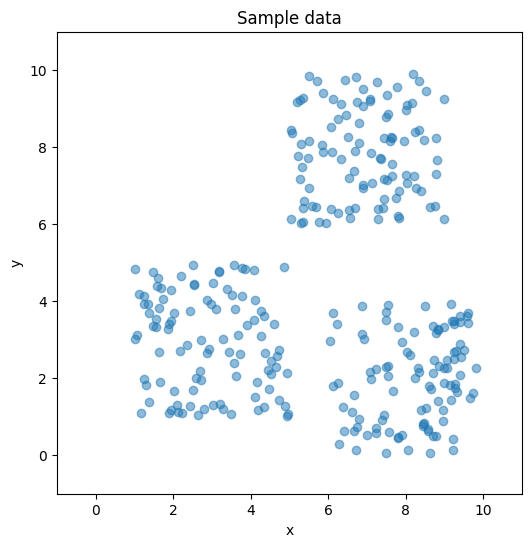

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(df['x'], df['y'], alpha=0.5)
ax.set_title("Sample data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
# plt.savefig('cluster_sample.png', dpi=300, facecolor='white')
plt.show()

## クラスタリング
Pandas のデータフレームから x 列と y 列を取り出して NumPy 配列に変換する．

In [4]:
# Pandas のデータフレームから NumPy 配列に変換
xy = df.loc[:, ['x', 'y']].values
print(xy)

[[7.4346 6.652 ]
 [6.5419 6.3611]
 [8.9819 9.2461]
 [3.8554 4.8386]
 [1.9527 3.4848]
 [4.7211 2.7247]
 [3.3898 4.314 ]
 [4.1745 1.904 ]
 [3.2748 3.0171]
 [1.8862 3.4178]
 [8.5039 3.8828]
 [6.1266 9.2484]
 [8.0289 9.1058]
 [8.6308 0.0555]
 [7.8328 6.8576]
 [3.7302 2.6266]
 [4.8645 4.877 ]
 [8.0025 7.2856]
 [2.5459 4.4306]
 [6.137  1.7974]
 [8.5746 0.6894]
 [3.1096 3.8017]
 [7.5434 2.0521]
 [6.5309 7.2001]
 [7.8023 6.2214]
 [2.7259 2.9847]
 [8.0999 2.5902]
 [5.3561 6.0701]
 [4.3389 1.2411]
 [8.0111 8.9655]
 [2.9169 2.7612]
 [4.27   3.1095]
 [8.2214 7.261 ]
 [7.2476 2.2446]
 [1.2535 3.9172]
 [3.2134 1.3254]
 [7.7424 6.6857]
 [7.2985 6.133 ]
 [2.0331 1.6603]
 [8.7515 6.4787]
 [8.4711 0.8318]
 [6.8671 3.8751]
 [3.4955 1.082 ]
 [7.7957 0.4588]
 [7.4505 7.1854]
 [7.4414 8.2468]
 [6.2326 3.4178]
 [6.1076 7.8718]
 [7.3626 7.6981]
 [9.4112 2.8906]
 [9.277  1.851 ]
 [8.0284 7.073 ]
 [7.417  6.4267]
 [4.5364 2.1067]
 [8.6496 1.7276]
 [7.8017 0.4752]
 [5.511  9.8412]
 [7.099  1.9779]
 [5.2764 7.182

クラスタ数を k=3に設定し，クラスタリングの計算を実行する．
なお，この結果は毎回異なる可能性があるので，再現性を持たせたい場合は 2 行目をコメントアウトし，3 行目を有効にすると良い（詳細はこちら）．

## クラスタリングの計算を実行

In [5]:
k = 3
# clf = KMeans(n_clusters=k) # モデルの設定
clf = KMeans(n_clusters=k, random_state=1) # 再現性を持たせたい場合
clf.fit(xy) # クラスタリングの計算
pred = clf.predict(xy) # 計算結果からサンプルデータがどのクラスタに属するかを予測する
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1,
       2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2,
       1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1], d

Pandas のデータフレームに分類結果を追加する．

## 分類結果を追加する

In [6]:
df['cluster_id'] = pred
df

,ID,x,y,cluster_id
0,0,7.4346,6.6520,0
1,1,6.5419,6.3611,0
2,2,8.9819,9.2461,0
3,3,3.8554,4.8386,1
4,4,1.9527,3.4848,1
...,...,...,...,...
295,295,4.1205,1.5010,1
296,296,9.2843,1.7563,2
297,297,6.6627,7.3856,0
298,298,5.7654,6.0543,0


分類結果の散布図を描いてみる．直感どおりうまく分割されていることがわかる．

## 散布図の描画

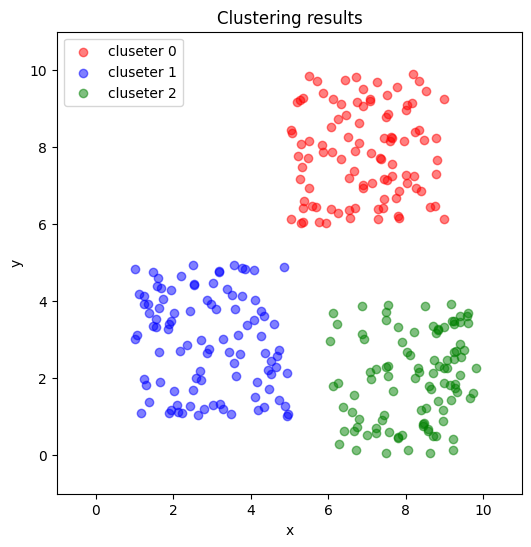

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colors = ['Red', 'Blue', 'Green']

for cls in range(k):
    x = df.loc[df['cluster_id'] == cls, 'x']
    y = df.loc[df['cluster_id'] == cls, 'y']
    ax.scatter(x, y, alpha=0.5, label=f"cluseter {cls}", color=colors[cls])

ax.set_title("Clustering results")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.legend(loc='upper left')
# plt.savefig('cluster_scatter.png', dpi=300, facecolor='white')
plt.show()

各クラスタに属するサンプル数の分布を調査する．100 個ずつ 3 つのクラスタに分割されていることがわかる．

## サンプル数の確認

In [8]:
# 各クラスタの特徴を確認する．このとき，ID の平均値 148.73 には意味がないことに注意する．

# クラスタ 0 は x が 8.21，y が 1.99 を中心とする付近のデータである．
# クラスタ0
display(df[df['cluster_id']==0].mean())

# クラスタ 1 は x が 6.92，y が 7.85 を中心とする付近のデータである．
# クラスタ1
display(df[df['cluster_id']==1].mean())

# クラスタ 2 は x が 2.92，y が 2.95 を中心とする付近のデータである．
# クラスタ2
display(df[df['cluster_id']==2].mean())

ID            149.390000
x               6.919016
y               7.845478
cluster_id      0.000000
dtype: float64

ID            150.380000
x               2.921705
y               2.946452
cluster_id      1.000000
dtype: float64

ID            148.730000
x               8.213697
y               1.991513
cluster_id      2.000000
dtype: float64

新たなデータが得られたときに，それらがどのクラスタに分類されるかテストしてみよう．
まずは，各クラスタの平均値に近いデータを与えてみる．

## 新たなデータで分析してみる

In [9]:
t1 = np.array([[6., 8.], [9., 2.], [3., 3.]])
print(t1)

clf.predict(t1)

[[6. 8.]
 [9. 2.]
 [3. 3.]]


array([0, 2, 1], dtype=int32)

In [10]:
# 次に，各クラスタから離れた値やクラスタの境界に近いデータを与えてみる．
# 少々いやらしいデータではどのようなクラスタになるだろうか？
t2 = np.array([[5., 11.], [11., 2.], [1., 6.], [5.8, 5.8], [5.8, 2.8], [5.0, 5.0]])
print(t2)
clf.predict(t2)

[[ 5.  11. ]
 [11.   2. ]
 [ 1.   6. ]
 [ 5.8  5.8]
 [ 5.8  2.8]
 [ 5.   5. ]]


array([0, 2, 1, 0, 2, 1], dtype=int32)